In [1]:
# Step:- Load data
import pandas as pd
import numpy as np
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Step:-2 summary statics
df.info() #information about data
df.describe() #includes mean, std, min, max, quartiles
df.isnull().sum() #check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


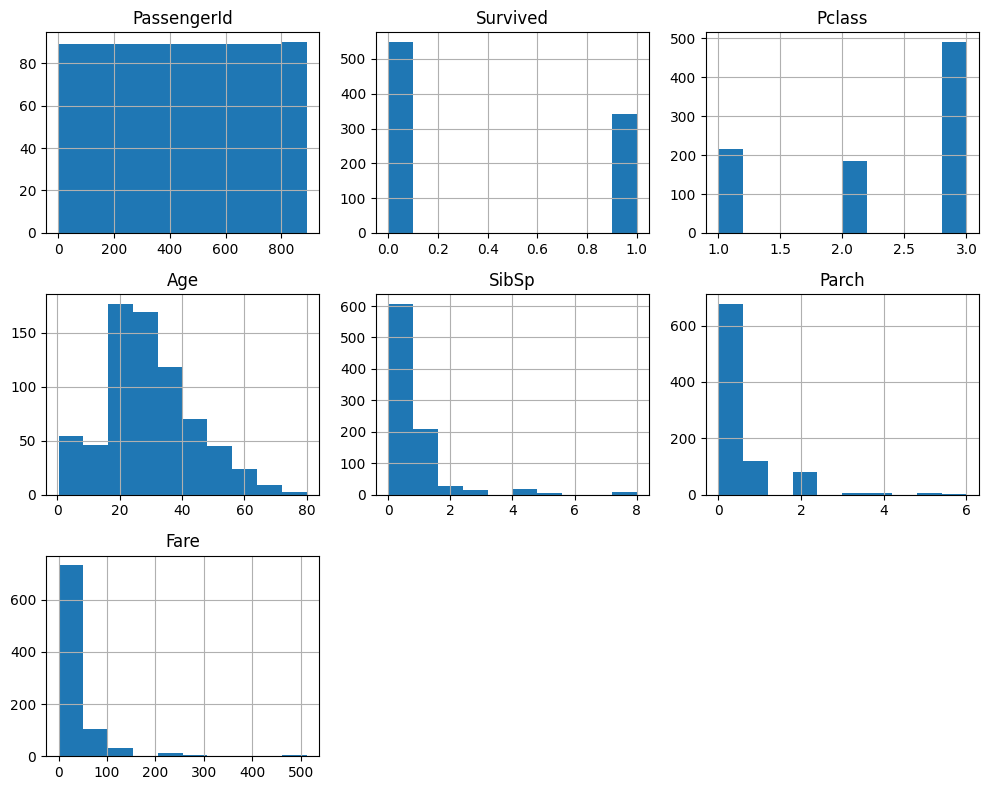

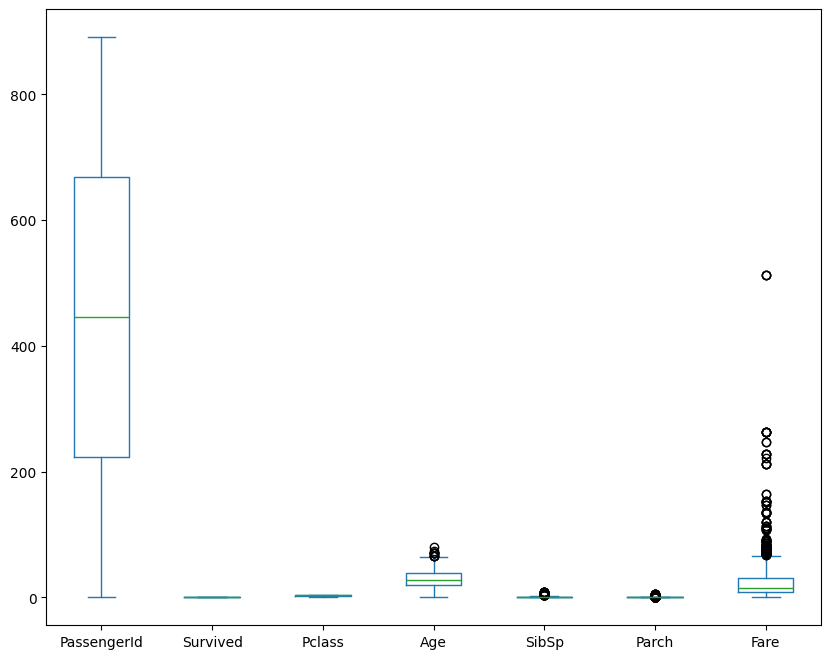

<Figure size 600x400 with 0 Axes>

In [7]:
#Step:-3 Histograms and boxplots
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

#Histograms
df[numeric_columns].hist(figsize=(10, 8),layout=(len(numeric_columns)//3+1,3))
plt.tight_layout()
plt.show()

#Boxplots
df[numeric_columns].plot(kind='box',figsize=(10,8),layout=(len(numeric_columns)//3+1,3))
plt.figure(figsize=(6,4))
plt.tight_layout()
plt.show()

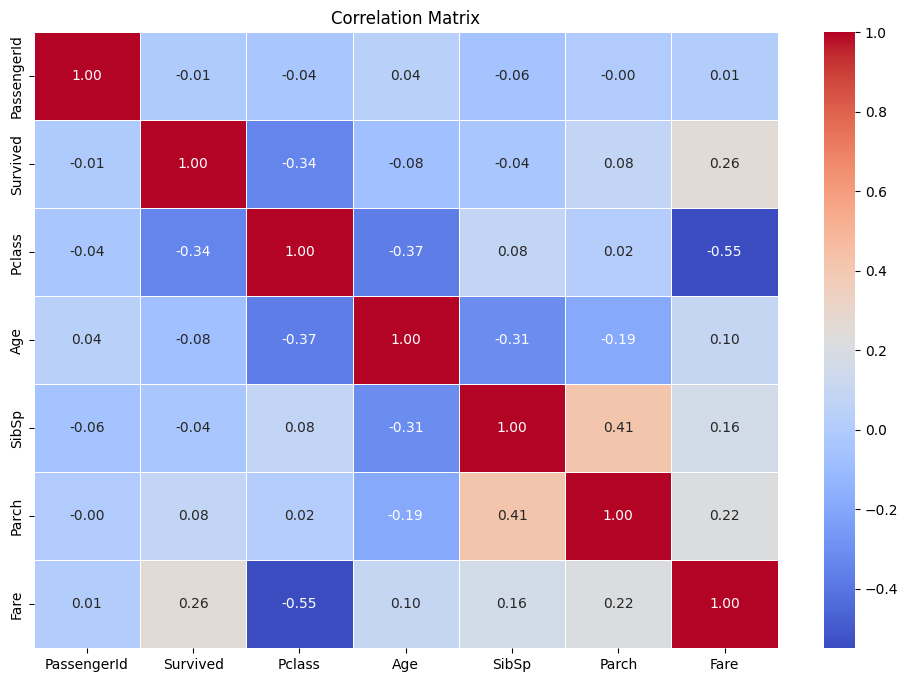

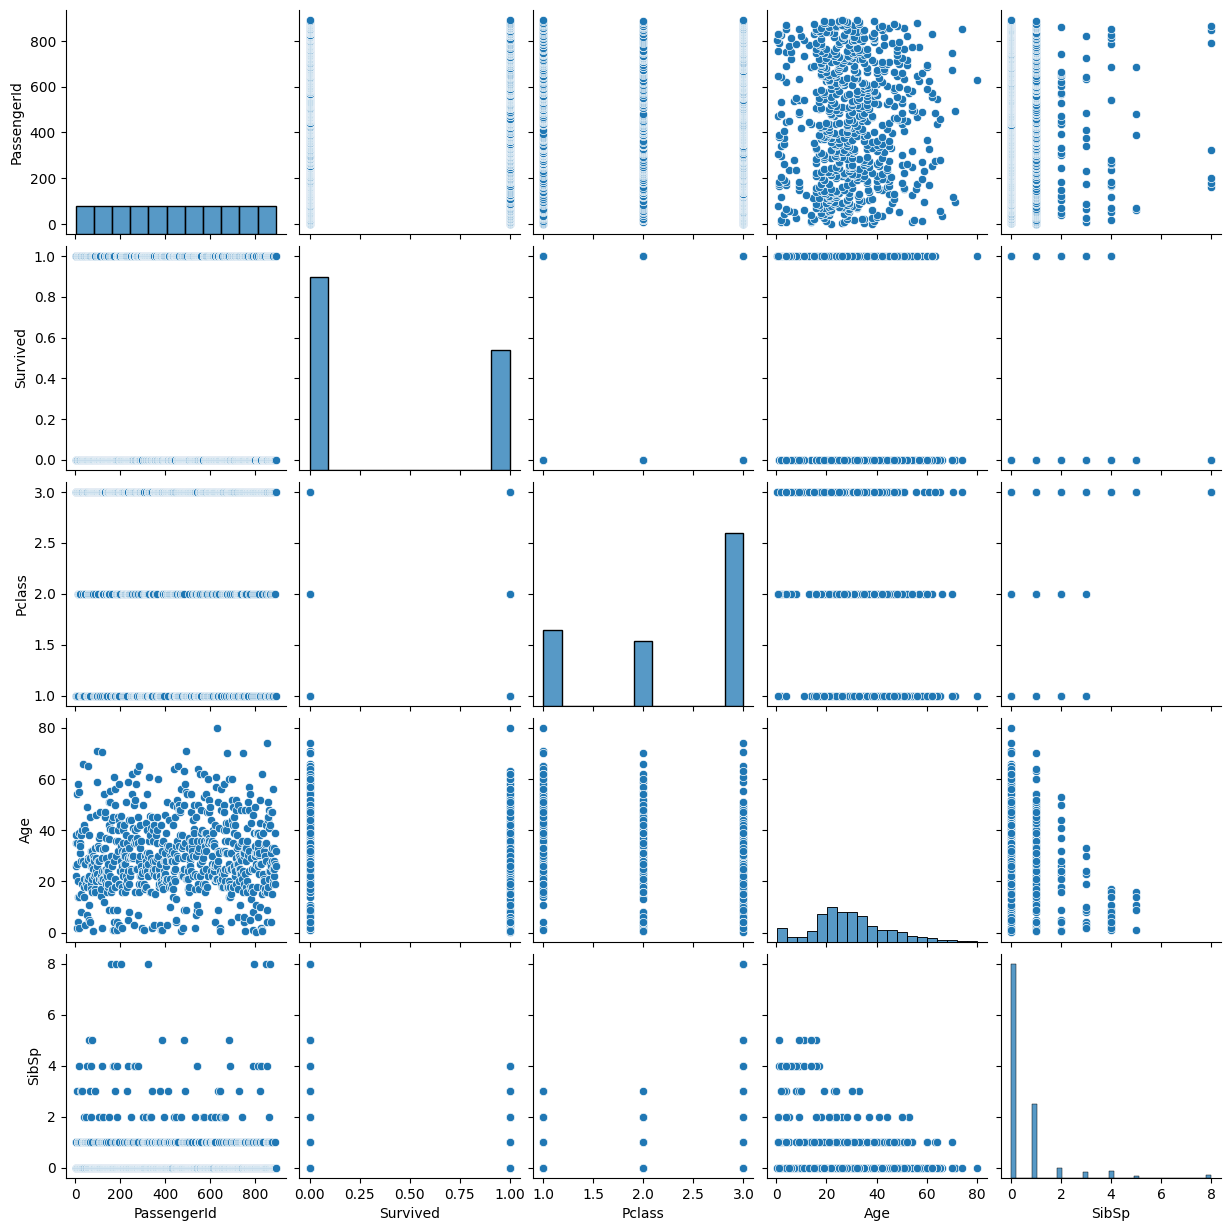

In [12]:
#step6 correlation matrix and pairplot
# Correlation Heatmap
numeric_df = df.select_dtypes(include=['number'])  # only numeric columns
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Pairplot (useful for small feature sets)
sns.pairplot(df[numeric_columns[:5]])  # subset to avoid clutter
plt.show()


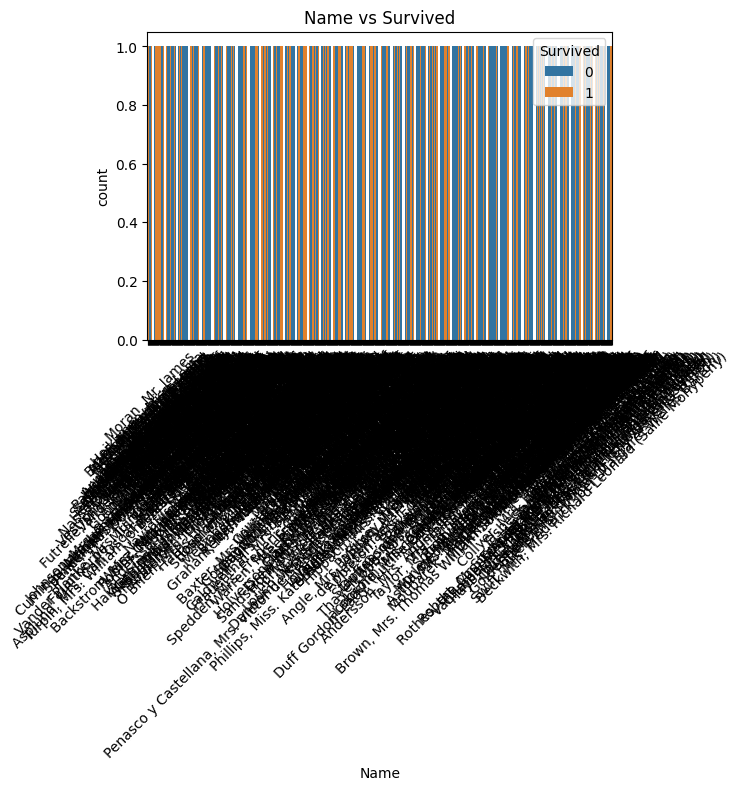

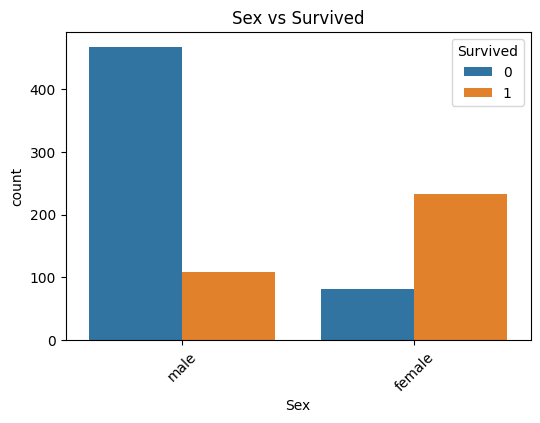

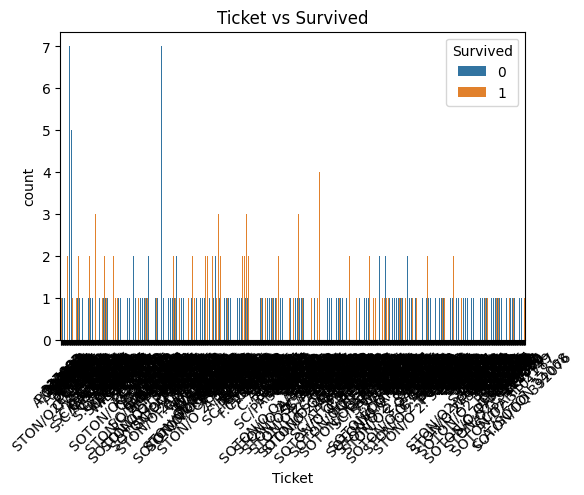

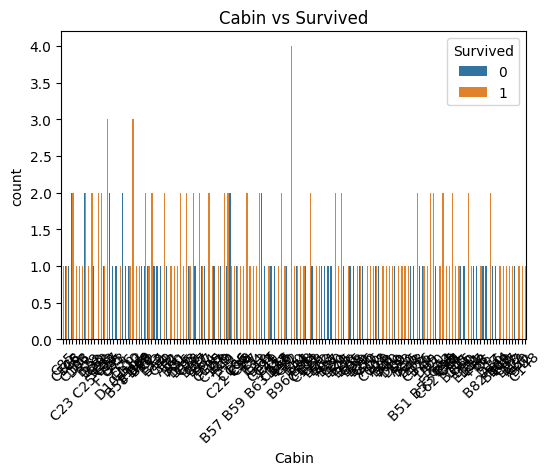

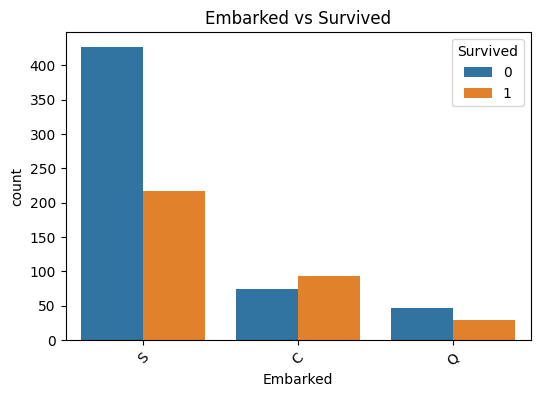

In [14]:
target_col = 'Survived'  # replace with  actual target column

categorical_columns = df.select_dtypes(include='object').columns.tolist()

for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue=target_col, data=df)
    plt.title(f'{col} vs {target_col}')
    plt.xticks(rotation=45)
    plt.show()


In [16]:
import plotly.express as px

fig = px.scatter_matrix(df,
                        dimensions=numeric_columns[:5],  # keep small to avoid clutter
                        color="Survived")
fig.update_layout(title="Scatter Matrix (Plotly)")
fig.show()


# New Section